#### #### README
 - **Topic: Employee Churn Prediction Modeling**
 - **This document: Modeling / Reusable codes**
 - **Previous document: [FINAL]EDA.ipynb**

## ## Settings

#### Display

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#### Packages

In [3]:
import math
import time
from datetime import datetime
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
import missingno as msno
from pandasql import sqldf

from scipy import stats
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC 
from sklearn_pandas import DataFrameMapper, gen_features, cross_validation

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('display.max_colwidth', -1)  
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 1000 
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus']=False
plt.style.use('ggplot')   # fivethirtyeight
psd = lambda q: sqldf(q, gloabls())
py.init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

## ## Data Overview

In [5]:
d_orig = pd.read_csv('./data/employee_attrition_ibm_data.csv')
d = d_orig.copy()
display(d.shape, d.head(2))

(1470, 35)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


In [5]:
# d.head(5).T

#### null check

In [6]:
# null_check_msno_bar(d)

In [7]:
# null_check_for_loop(d)

In [8]:
null_check_for_loop(d)

column: Age                           	 Percent of NaN value: 0.00%
column: Attrition                     	 Percent of NaN value: 0.00%
column: BusinessTravel                	 Percent of NaN value: 0.00%
column: DailyRate                     	 Percent of NaN value: 0.00%
column: Department                    	 Percent of NaN value: 0.00%
column: DistanceFromHome              	 Percent of NaN value: 0.00%
column: Education                     	 Percent of NaN value: 0.00%
column: EducationField                	 Percent of NaN value: 0.00%
column: EmployeeCount                 	 Percent of NaN value: 0.00%
column: EmployeeNumber                	 Percent of NaN value: 0.00%
column: EnvironmentSatisfaction       	 Percent of NaN value: 0.00%
column: Gender                        	 Percent of NaN value: 0.00%
column: HourlyRate                    	 Percent of NaN value: 0.00%
column: JobInvolvement                	 Percent of NaN value: 0.00%
column: JobLevel                      	 Percent 

#### peek

In [11]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
d.describe(include='all')   

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


#### target variable

In [6]:
d.Attrition.value_counts()

No     1233
Yes    237 
Name: Attrition, dtype: int64

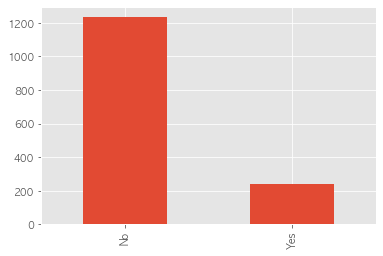

In [7]:
d.Attrition.value_counts().plot(kind='bar')

# ## Basic Common Processing

In [8]:
# Reassign target
d.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)

# Find & Delete the useless features
li_useless_feat = []
for col in list(d.columns):
    if d[col].nunique() == 1:
        li_useless_feat.append(col)
print('Useless Features:{}'.format(li_useless_feat))
d.drop(columns=li_useless_feat, inplace=True)

# generation-related functions
def age_to_born_yyyy(x):
    return 2015 - x
def cat_generation(x):
    if (x>=1940) & (x<=1959):
        return 'gen_baby_boomer'
    elif (x>=1960) & (x<=1979):
        return 'gen_x'
    elif (x>=1980) & (x<=1994):
        return 'gen_y'
    elif (x>=1995) & (x<=2010):
        return 'gen_z'
    else:
        return 'gen_alpha'        

# Add generation-related columns
d['born_yyyy'] = d.Age.apply(age_to_born_yyyy)
d['generation'] = d.born_yyyy.apply(cat_generation)

# separate the dataframe regarding generations
d_x = pd.read_csv('./data/gen_x_data.csv')
d_y = pd.read_csv('./data/gen_y_data.csv')
d_z = pd.read_csv('./data/gen_z_data.csv')

d.head(2)

Useless Features:['EmployeeCount', 'Over18', 'StandardHours']


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5,1974,gen_x
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7,1966,gen_x


In [23]:
# Reassign target
d.Attrition.replace(to_replace = dict(Yes = 1, No = 0), inplace = True)
d.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7


# ## Prediction / Modeling

#### Label Encoding

In [10]:
# d.select_dtypes(include='object')

In [11]:
# Encode the categorical variables so that scikit-learn can read them
col_categorical = list(d.select_dtypes(include='object').columns)
feature_map = gen_features(columns= col_categorical, classes=[LabelEncoder])
mapping = DataFrameMapper(feature_map)
d[col_categorical] = mapping.fit_transform(d)
d.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,born_yyyy,generation
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,1974,1
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1966,1
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,1978,1


#### Randomforest Classification

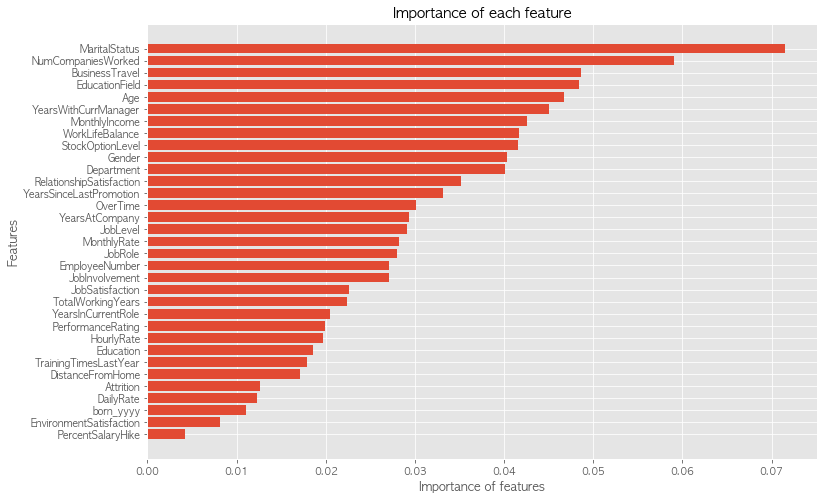

In [12]:
rf = RandomForestClassifier(class_weight="balanced", n_estimators=500) 
rf.fit(d.drop(['Attrition'],axis=1), d.Attrition)
importances = rf.feature_importances_
names = d.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

#### Prediction / k-fold-CV (k=10)

In [13]:
# Make predictions using 10-K-Fold-CV

# Baseline:
print((d.Attrition.value_counts()/(d.shape[0]))*100)

# Accuracy
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# ROC
scores = cross_val_score(rf, d.drop(['Attrition'],axis=1), d.Attrition, cv=10, scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0    83.877551
1    16.122449
Name: Attrition, dtype: float64
[0.85034014 0.83673469 0.85714286 0.85034014 0.8707483  0.85714286
 0.84353741 0.87755102 0.85034014 0.86394558]
Accuracy: 0.86 (+/- 0.02)
[0.83265583 0.82571138 0.8270664  0.73661924 0.85772358 0.76134824
 0.75423442 0.74474053 0.84274194 0.80697756]
ROC_AUC: 0.80 (+/- 0.09)
